In [ ]:
import pandas as pd

In [ ]:
# Attempting to load and merge the files again with a more granular approach

# Load the files one by one
df1 = pd.read_csv('/content/traffic_data_20240917_185639_204a2503-d8a2-4c14-aefe-0acf4a61cc14.csv')
df2 = pd.read_csv('/content/traffic_data_20240917_201916_b9c0a8c9-0855-40f1-bc12-1be60dd42f27.csv')
df3 = pd.read_csv('/content/traffic_data_20240917_210306_56fcdd63-a33d-4964-b3ea-11a87603ef80.csv')
df4 = pd.read_csv('/content/traffic_data_20240917_214545_32b0dc36-07de-4a52-9ef6-dc13ba95fe28.csv')
df5 = pd.read_csv('/content/traffic_data_20240917_230234_6583ffb0-f353-4ed0-aee1-8a52d424ccef.csv')
df6 = pd.read_csv('/content/traffic_data_20240918_001359_706bfe5e-187d-4291-89b6-8039f4adefd5.csv')
df7 = pd.read_csv('/content/traffic_data_20240918_074818_d7dfef34-3ab1-45bb-9279-3d738396795e.csv')
df8 = pd.read_csv('/content/traffic_data_20240918_131538_1aad3567-0967-4343-9d07-fe9c40703ae4.csv')
df9 = pd.read_csv('/content/traffic_data_20240918_171831_fad6e4df-f7b7-423a-bee6-560c7a190ef3.csv')

# Concatenate all dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

# Display the merged dataframe to the user
df


,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,Start_point,End_point
0,العجلية,0.289,1.700000,10.200000,-0.033333,Blue,2024-09-17T18:54:08.220109,"(24.6345318, 46.6989093)","(24.6332014, 46.6986829)"
1,طريق الأرطاوية أم الجماجم,201.086,117.150000,102.988988,3.483333,Blue,2024-09-17T18:54:08.462213,"(26.8989379, 45.3260035)","(26.866834, 45.3127513)"
2,شارع برودان,352.026,199.383333,105.934431,8.466667,Blue,2024-09-17T18:54:08.727997,"(22.5287906, 45.09149550000001)","(22.5214768, 45.0786209)"
3,القويعية,4.397,10.750000,24.541395,3.616667,Red,2024-09-17T18:54:08.915785,"(24.7586767, 46.70162699999999)","(24.7564578, 46.6969467)"
4,صلبوخ,0.385,1.783333,12.953271,0.000000,Blue,2024-09-17T18:54:09.116434,"(24.5293006, 46.70255179999999)","(24.5263552, 46.7001172)"
...,...,...,...,...,...,...,...,...,...
6231,بيدة,8.496,19.200000,26.550000,0.883333,Blue,2024-09-18T17:18:30.604090,"(24.6137046, 46.6878894)","(24.5886539, 46.6349367)"
6232,عبداللطيف الخيمي,6.273,17.700000,21.264407,8.666667,Red,2024-09-18T17:18:30.781764,"(24.6668921, 46.7040428)","(24.6644876, 46.6998152)"
6233,الحويرة,10.444,16.016667,39.124246,-0.366667,Blue,2024-09-18T17:18:30.949820,"(24.6860722, 46.8153462)","(24.6433178, 46.7776658)"
6234,التوحيد,6.077,7.050000,51.719149,-0.066667,Blue,2024-09-18T17:18:31.114102,"(24.5602792, 46.6204638)","(24.5516396, 46.609009)"


In [ ]:
gd = df.groupby(['road_name', 'Start_point', 'End_point']).agg({
    'delay_min': 'mean',
    'speed_kmh': 'mean',
    'duration_in_traffic_min': 'mean',
    'distance_km': 'mean',
    'traffic_condition': lambda x: x.mode()[0]  # Take the most frequent traffic condition
}).reset_index()

In [ ]:
gd.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.335185,49.992038,14.209259,11.734222,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.181481,34.510183,14.681481,8.404000,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.020370,48.384365,7.570370,6.094000,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.131481,55.430372,41.835185,38.632000,Blue
4,63 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.183333,34.498791,14.683333,8.404000,Yellow


In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   road_name                693 non-null    object 
 1   Start_point              693 non-null    object 
 2   End_point                693 non-null    object 
 3   delay_min                693 non-null    float64
 4   speed_kmh                693 non-null    float64
 5   duration_in_traffic_min  693 non-null    float64
 6   distance_km              693 non-null    float64
 7   traffic_condition        693 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.4+ KB


In [ ]:
gd.shape

(693, 8)

In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   road_name                693 non-null    object 
 1   Start_point              693 non-null    object 
 2   End_point                693 non-null    object 
 3   delay_min                693 non-null    float64
 4   speed_kmh                693 non-null    float64
 5   duration_in_traffic_min  693 non-null    float64
 6   distance_km              693 non-null    float64
 7   traffic_condition        693 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.4+ KB


In [ ]:
gd.duplicated().sum()

0

In [ ]:
gd.isna().sum()

,0
road_name,0
Start_point,0
End_point,0
delay_min,0
speed_kmh,0
duration_in_traffic_min,0
distance_km,0
traffic_condition,0


In [ ]:
import pandas as pd

# Assuming 'grouped_data' is your dataframe

# Group the data by 'Start_point' and 'End_point' and filter where there are multiple road names
# similar_points = gd.groupby(['Start_point', 'End_point']).filter(lambda x: x['road_name'].nunique() > 1)

# Display the filtered data as a DataFrame
similar_points_df = pd.DataFrame(similar_points)

# Display the DataFrame
similar_points_df


,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.181481,34.510183,14.681481,8.404000,Yellow
4,63 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.183333,34.498791,14.683333,8.404000,Yellow
6,AL Hadad,"(24.6927368, 46.7944167)","(24.6437154, 46.7883665)",-0.887037,43.452083,15.818519,11.437333,Blue
7,Abdulaziz Al Fereh,"(24.6746147, 46.73819719999999)","(24.586689, 46.6373493)",0.959259,33.720841,36.285185,19.598889,Blue
8,Abdullah Bin Omar,"(24.750219, 46.8446611)","(24.7078712, 46.815598)",-0.705556,38.380332,20.425926,13.084222,Blue
12,Abu Thabit,"(24.7534692, 46.8495065)","(24.7095964, 46.815598)",0.094444,47.168273,18.861111,14.762000,Blue
13,Afif,"(23.9556658, 42.9571364)","(23.8511982, 42.8685665)",0.831481,49.580644,21.135185,17.436667,Blue
14,Airport Road,"(24.9974697, 46.7381783)","(24.7791458, 46.6512239)",0.729630,51.723658,42.512963,36.600444,Blue
15,Aka,"(24.6936072, 46.8313384)","(24.6565883, 46.75510370000001)",-1.027778,39.230857,18.579630,12.038222,Blue
17,Al Ahmad Valley,"(24.5590467, 46.70917670000001)","(24.49419, 46.6364446)",-1.066667,34.175965,24.450000,13.914000,Blue


In [ ]:
df = gd[(gd['Distance (km)'] <= 81) & (gd['Distance (km)'] >= 7)]

KeyError: 'Distance (km)'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

# Convert the string representation of tuples into actual tuples
df['Start_point'] = df['Start_point'].apply(ast.literal_eval)
df['End_point'] = df['End_point'].apply(ast.literal_eval)

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot polylines for each road
for index, row in df.iterrows():
    start_lat, start_lng = row['Start_point']
    end_lat, end_lng = row['End_point']

    # Plot each road line with its start and end points
    plt.plot([start_lng, end_lng], [start_lat, end_lat], marker='o', label=row['Road Name'])

# Adding labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Road Directions Plot")

# Display the plot
plt.show()


KeyError: 'Road Name'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/formatted_traffic_data .csv')
df.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition,Distance_Cluster
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,14.21,11.73,Blue,0
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,14.68,8.40,Yellow,0
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,7.57,6.09,Blue,0
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,41.84,38.63,Blue,2
4,65,"(25.15493010000003, 47.1735343)","(24.29445029999997, 46.42912490000001)",6.84,74.65,155.63,193.54,Blue,3


In [ ]:
df.shape

(439, 9)

In [ ]:
df.drop('Distance_Cluster', axis=1, inplace=True) # Drop the 'Distance_Cluster' column from the DataFrame. Use axis=1 to specify that you're dropping a column.

In [ ]:
df

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,14.21,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,14.68,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,7.57,6.09,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,41.84,38.63,Blue
4,65,"(25.15493010000003, 47.1735343)","(24.29445029999997, 46.42912490000001)",6.84,74.65,155.63,193.54,Blue
...,...,...,...,...,...,...,...,...
434,وادي درعة,"(24.6628532, 46.8264947)","(24.6359111, 46.7684062)",-0.86,34.90,14.71,8.52,Blue
435,وادي لبن,"(24.6405615, 46.6512239)","(24.5680149, 46.4489184)",0.59,46.14,34.63,26.34,Blue
436,وادي هجر,"(24.8181963, 46.6186549)","(24.8093034, 46.6005703)",0.99,31.20,13.54,6.85,Blue
437,وعلة,"(24.6715975, 46.7441469)","(24.6187426, 46.6930971)",3.36,29.18,23.77,11.07,Blue


In [ ]:
df = df[df['distance_km'] <= 80]

# Display the updated DataFrame to ensure the rows have been removed
df.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,14.21,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,14.68,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,7.57,6.09,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,41.84,38.63,Blue
5,AL Hadad,"(24.6927368, 46.7944167)","(24.6437154, 46.7883665)",-0.89,43.45,15.82,11.44,Blue


In [ ]:
df.shape

(434, 8)

In [ ]:
df['distance_km'].max()

79.62

In [ ]:
pd.set_option('display.max_rows', None)
df


,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,14.21,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,14.68,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,7.57,6.09,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,41.84,38.63,Blue
5,AL Hadad,"(24.6927368, 46.7944167)","(24.6437154, 46.7883665)",-0.89,43.45,15.82,11.44,Blue
6,Abdulaziz Al Fereh,"(24.6746147, 46.73819719999999)","(24.586689, 46.6373493)",0.96,33.72,36.29,19.60,Blue
7,Abdullah Bin Omar,"(24.750219, 46.8446611)","(24.7078712, 46.815598)",-0.71,38.38,20.43,13.08,Blue
8,Abi Hasain Al Hanbali,"(24.8022123, 46.6638953)","(24.7837499, 46.6243831)",0.10,34.61,15.61,8.82,Blue
9,Abi Safwon,"(24.9122469, 46.8107557)","(24.903784, 46.7938116)",-0.22,55.74,8.23,7.64,Blue
10,Abi Taher Ibn Al Salam,"(24.722725, 46.8276552)","(24.692795, 46.7947917)",-1.16,28.81,13.22,6.31,Blue


In [ ]:
roads_greater_than_50 = df[df['distance_km'] > 50]

# Display the result
roads_greater_than_50[['road_name', 'distance_km']]

,road_name,distance_km
29,Al Hair Road,56.89
88,Jeddah Road,52.83
92,King Abdul Aziz Road,57.52
109,Northern Ring Road,55.00
140,أبي المنصور البغدادي,76.01
158,إمتداد الطريق الدائري الشرقي - وصلة الخرج),68.05
308,رقم 513,60.44
359,صنعاء,52.73
361,طريق أبي بكر الصديق,50.70
362,طريق أم الجماجم حفر الباطن,79.62


In [ ]:
r_sh = [29,88,92,109,140,158,308,359,361,362,381,406]
df.loc[r_sh]

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
29,Al Hair Road,"(24.5987783, 46.8446611)","(24.3780824, 46.7285093)",-0.00,59.73,57.64,56.89,Blue
88,Jeddah Road,"(24.6942703, 46.64157160000001)","(24.5263166, 46.4387046)",2.34,75.92,42.63,52.83,Blue
92,King Abdul Aziz Road,"(24.9996923, 46.7285093)","(24.6422095, 46.5499681)",1.77,60.83,57.20,57.52,Blue
109,Northern Ring Road,"(24.9560346, 47.01452949999999)","(24.7258755, 46.5830947)",2.80,77.95,43.09,55.00,Blue
140,أبي المنصور البغدادي,"(33.525989, 44.59157)","(33.1945229, 44.238519)",1.30,48.88,93.78,76.01,Blue
158,إمتداد الطريق الدائري الشرقي - وصلة الخرج),"(24.6385281, 46.9513691)","(24.4952017, 46.7962319)",-3.97,58.51,69.84,68.05,Blue
308,رقم 513,"(24.6167776, 46.9513691)","(24.4952017, 46.815598)",-3.22,51.57,70.55,60.44,Blue
359,صنعاء,"(15.5113795, 44.28496579999999)","(15.2547096, 44.1375954)",0.03,32.69,96.78,52.73,Blue
361,طريق أبي بكر الصديق,"(24.9673426, 46.7285093)","(24.6981028, 46.58851749999999)",1.02,63.46,48.11,50.70,Blue
362,طريق أم الجماجم حفر الباطن,"(28.4738219, 46.0881615)","(28.1959598, 45.84457399999999)",-1.10,74.39,64.25,79.62,Blue


In [ ]:
df.drop([140, 308, 359, 362, 381], inplace=True)

<ipython-input-14-49a1e2253adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([140, 308, 359, 362, 381], inplace=True)


In [ ]:
df.shape

(429, 8)

In [ ]:
df.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,14.21,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,14.68,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,7.57,6.09,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,41.84,38.63,Blue
5,AL Hadad,"(24.6927368, 46.7944167)","(24.6437154, 46.7883665)",-0.89,43.45,15.82,11.44,Blue


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-19-0f9aaf616228>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_in_traffic_min'] = kmeans.fit_predict(X)


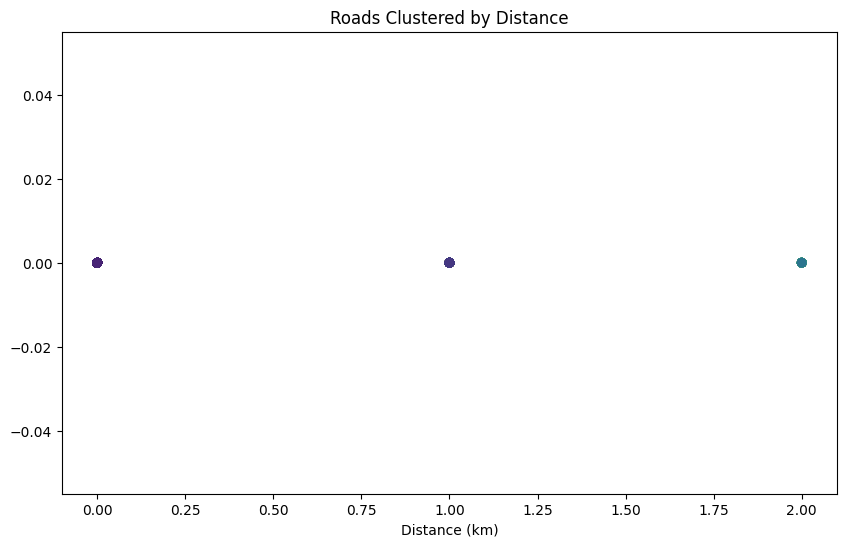

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X = df[['duration_in_traffic_min']].values

kmeans = KMeans(n_clusters=3, random_state=0)

df['duration_in_traffic_min'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['duration_in_traffic_min'], np.zeros_like(df['duration_in_traffic_min']),
            c=df['distance_km'], cmap='viridis', label=df['road_name'])
plt.xlabel("Distance (km)")
plt.title("Roads Clustered by Distance")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# X, y = make_blobs([...]) # make the blobs: y contains the cluster IDs, but we
# will not use them; that's what we want to predict
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
import cv2


# Coordinates of the bounding box (adjust these coordinates as per your case)
start_point = (24.985496, 46.467449)  # Top-left point of the bounding box
end_point = (24.609640, 46.928374)    # Bottom-right point of the bounding box

# Convert coordinates to integers for drawing
start_point = (int(start_point[0] * 1000), int(start_point[1] * 1000))  # Multiplying by 1000 as an example
end_point = (int(end_point[0] * 1000), int(end_point[1] * 1000))

# Define color and thickness of the rectangle
color = (120, 0, 120)  # RGB color (purple)
thickness = 2          # Thickness of the bounding box


In [1]:
import pandas as pd
df = pd.read_csv('/Users/cornflex/Desktop/Project/T5/T5-CapstoneProject/WebScraping/Filter_Roads/formatted_traffic_data.csv')
df.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition,Distance_Cluster
0,'Al Sabe,"(24.60, 46.60)","(24.60, 46.59)",1.34,49.99,14.21,11.73,Blue,0
1,110 ممر,"(24.59, 46.64)","(24.57, 46.58)",1.18,34.51,14.68,8.40,Yellow,0
2,3rd Roundabout,"(24.67, 46.80)","(24.66, 46.79)",0.02,48.38,7.57,6.09,Blue,0
3,5399,"(24.44, 46.82)","(24.39, 46.62)",-1.13,55.43,41.84,38.63,Blue,2
4,65,"(25.15, 47.17)","(24.29, 46.43)",6.84,74.65,155.63,193.54,Blue,3


In [2]:
# pd.set_option('display.max_rows', None)
# df.isna().sum()

In [3]:
df.shape

(439, 9)

In [4]:
df.describe()

,delay_min,speed_kmh,duration_in_traffic_min,distance_km,Distance_Cluster
count,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.433804,42.012210,19.587335,15.389704,0.223235
std,1.351103,12.543962,16.881555,24.214811,0.644830
min,-3.970000,9.390000,0.600000,0.120000,0.000000
25%,-0.365000,33.330000,11.815000,7.205000,0.000000
50%,0.070000,40.200000,15.310000,9.200000,0.000000
75%,1.040000,48.190000,21.145000,14.270000,0.000000
max,6.840000,108.220000,195.330000,352.030000,3.000000


In [6]:
pd.set_option('display.max_rows', None)
df = df[df['distance_km'] >= 5]

In [7]:
df.shape

(415, 8)

In [9]:
import ast

df['Start_point'] = df['Start_point'].apply(ast.literal_eval)
df['End_point'] = df['End_point'].apply(ast.literal_eval)


top_left = (24.985496, 46.467449)
bottom_right = (24.609640, 46.928374)

def clean_in_riyadh(row):
  road_start = row['Start_point']
  road_end = row['End_point']
  if (((road_start[0] <= top_left[0]) and (road_start[1] >= top_left[1])) and ((road_start[0] >= bottom_right[0]) and (road_start[1] <= bottom_right[1]))):
    return 'in'

  elif (((road_end[0] <= top_left[0]) and (road_end[1] >= top_left[1])) and((road_end[0] >= bottom_right[0]) and (road_end[1] <= bottom_right[1]))):
    return 'in'

  else:
    return None

df['outside_riyadh'] = df.apply(clean_in_riyadh,axis=1)


In [10]:
pd.set_option('display.max_rows', None)
df.isna().sum()

,0
road_name,0
Start_point,0
End_point,0
delay_min,0
speed_kmh,0
duration_in_traffic_min,0
distance_km,0
traffic_condition,0
outside_riyadh,97


In [11]:
em_va = df[df['outside_riyadh'].isna()]
em_va

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition,outside_riyadh
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,0,8.40,Yellow,None
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,2,38.63,Blue,None
11,Afif,"(23.9556658, 42.9571364)","(23.8511982, 42.8685665)",0.83,49.58,1,17.44,Blue,None
15,Al Ahmad Valley,"(24.5590467, 46.70917670000001)","(24.49419, 46.6364446)",-1.07,34.18,1,13.91,Blue,None
19,Al Awali,"(24.5767642, 46.66049169999999)","(24.5428661, 46.5796016)",-0.65,39.71,1,12.24,Blue,None
21,Al Difa,"(24.5983788, 46.8560037)","(24.5735721, 46.8088237)",1.19,45.51,1,19.72,Blue,None
28,Al Hair Road,"(24.5987783, 46.8446611)","(24.3780824, 46.7285093)",-0.00,59.73,2,56.89,Blue,None
31,Al Hazm,"(24.5715387, 46.678946)","(24.5170548, 46.62255260000001)",-0.08,43.62,1,14.61,Blue,None
32,Al Imam S'Aud Bin Abdulaziz Bin Mohammed,"(24.6060597, 46.8495065)","(24.5533825, 46.7744539)",1.43,42.39,2,22.27,Blue,None
36,Al Khazaf,"(24.5848639, 46.686229)","(24.5702727, 46.6453418)",-0.28,43.41,0,6.47,Blue,None


In [12]:
df.dropna(inplace=True)

In [13]:
df.drop(columns=['outside_riyadh'],inplace=True)

In [14]:
df.shape

(313, 8)

In [15]:
df[df['delay_min'] < 0]

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
4,AL Hadad,"(24.6927368, 46.7944167)","(24.6437154, 46.7883665)",-0.89,43.45,0,11.44,Blue
6,Abdullah Bin Omar,"(24.750219, 46.8446611)","(24.7078712, 46.815598)",-0.71,38.38,1,13.08,Blue
8,Abi Safwon,"(24.9122469, 46.8107557)","(24.903784, 46.7938116)",-0.22,55.74,0,7.64,Blue
9,Abi Taher Ibn Al Salam,"(24.722725, 46.8276552)","(24.692795, 46.7947917)",-1.16,28.81,0,6.31,Blue
13,Aka,"(24.6936072, 46.8313384)","(24.6565883, 46.75510370000001)",-1.03,39.23,1,12.04,Blue
25,Al Ghadir,"(24.7862846, 46.6684286)","(24.7610666, 46.640876)",-0.27,36.17,0,8.69,Blue
29,Al Hamla,"(24.7913163, 46.77653309999999)","(24.7598942, 46.730632)",-0.29,41.17,0,9.45,Blue
34,Al Janadriyah,"(24.9445838, 46.9975312)","(24.7875365, 46.84589709999999)",-0.07,73.29,2,40.18,Blue
35,Al Jazeera Al Khuzra,"(24.6860722, 46.8153462)","(24.6433178, 46.7776658)",-1.11,41.18,0,10.44,Blue
37,Al Khozama,"(24.7363514, 46.6231959)","(24.691285, 46.5685328)",-0.26,45.73,1,14.24,Blue


In [ ]:
# df.drop('Distance_Cluster', axis=1, inplace=True) # Drop the 'Distance_Cluster' column from the DataFrame. Use axis=1 to specify that you're dropping a column.

In [16]:
df = df[df['delay_min'] > 0]
df.shape

(192, 8)

In [17]:
df

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,0,6.09,Blue
5,Abdulaziz Al Fereh,"(24.6746147, 46.73819719999999)","(24.586689, 46.6373493)",0.96,33.72,2,19.60,Blue
7,Abi Hasain Al Hanbali,"(24.8022123, 46.6638953)","(24.7837499, 46.6243831)",0.10,34.61,0,8.82,Blue
10,Abu Thabit,"(24.7534692, 46.8495065)","(24.7095964, 46.815598)",0.09,47.17,1,14.76,Blue
12,Airport Road,"(24.9974697, 46.7381783)","(24.7791458, 46.6512239)",0.73,51.72,2,36.60,Blue
14,Al Abbas Al Rashidi St.,"(24.6923431, 46.8495065)","(24.5915754, 46.7865516)",2.29,45.69,2,22.51,Blue
16,Al Ammar,"(24.7286847, 46.6826067)","(24.6936181, 46.6457942)",0.26,27.17,0,6.96,Blue
17,Al Anbari,"(24.7330062, 46.7599405)","(24.6821831, 46.74875600000001)",0.20,36.43,0,8.36,Blue
18,Al Ataya,"(24.7536362, 46.7623591)","(24.7333674, 46.7088747)",0.33,38.30,0,7.23,Blue
20,Al Basham St.,"(24.7493703, 46.8243757)","(24.6834516, 46.7679526)",1.67,43.85,1,13.81,Yellow


In [25]:
# # List of row indices to delete
# rows_to_delete = [ 46, 51, 52, 54, 62, 65, 72, 104, 107, 114, 117, 157, 170, 205, 216, 219, 224, 276, 291, 322]

# # Drop the rows with the specified indices
# df = df.drop(index=rows_to_delete)

# # The original dataframe 'df' is now updated with the specified rows deleted


In [26]:
# # Select the specific rows from the DataFrame df
# rows_to_save = [0, 46, 51, 52, 54, 62, 65, 72, 104, 107, 114, 117, 157, 170, 205, 216, 219, 224, 276, 291, 322]

# # Get the rows from the DataFrame
# selected_rows = df.loc[rows_to_save]

# # Display the selected rows
# selected_rows

In [19]:
# # List of row indices to delete
# rows_to_delete = [0,65, 72,276, 291]

# # Get a list of valid indices in the DataFrame
# valid_indices = df.index

# # Filter the list of rows to delete to only include valid indices
# rows_to_delete = [row for row in rows_to_delete if row in valid_indices]

# # Drop the rows with the specified indices
# df = df.drop(index=rows_to_delete)

# # The original dataframe 'df' is now updated with the specified rows deleted

In [20]:
df.shape

(192, 8)

In [22]:
df = df.reset_index(drop=True)

In [21]:
df.loc[df['distance_km'] == df['distance_km'].max()]

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
91,King Abdul Aziz Road,"(24.9996923, 46.7285093)","(24.6422095, 46.5499681)",1.77,60.83,2,57.52,Blue


In [27]:
df.loc[df['distance_km'] == df['distance_km'].min()]

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
140,شارع الأمير سلطان بن سلمان بن عبدالعزيز,"(24.7275999, 46.6813993)","(24.7154815, 46.6590677)",1.04,32.25,0,5.74,Blue


In [30]:
# X = df.loc[:, ['duration_in_traffic_min', 'distance_km']]

In [31]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# plt.scatter(x= X['duration_in_traffic_min'], y=X['distance_km'])
# plt.xlabel('duration_in_traffic_min')
# plt.ylabel('distance_km');

In [ ]:
#X

In [ ]:
# df['distance_km'].max()

57.52

In [ ]:
# pd.set_option('display.max_rows', None)
# df

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,0,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,0,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,0,6.09,Blue
5,Abdulaziz Al Fereh,"(24.6746147, 46.73819719999999)","(24.586689, 46.6373493)",0.96,33.72,2,19.60,Blue
7,Abi Hasain Al Hanbali,"(24.8022123, 46.6638953)","(24.7837499, 46.6243831)",0.10,34.61,0,8.82,Blue
10,Abu Thabit,"(24.7534692, 46.8495065)","(24.7095964, 46.815598)",0.09,47.17,1,14.76,Blue
11,Afif,"(23.9556658, 42.9571364)","(23.8511982, 42.8685665)",0.83,49.58,1,17.44,Blue
12,Airport Road,"(24.9974697, 46.7381783)","(24.7791458, 46.6512239)",0.73,51.72,2,36.60,Blue
14,Al Abbas Al Rashidi St.,"(24.6923431, 46.8495065)","(24.5915754, 46.7865516)",2.29,45.69,2,22.51,Blue
16,Al Ammar,"(24.7286847, 46.6826067)","(24.6936181, 46.6457942)",0.26,27.17,0,6.96,Blue


In [33]:
roads_greater_than_50 = df[df['distance_km'] > 50]

# Display the result
roads_greater_than_50[['road_name', 'distance_km']]

,road_name,distance_km
36,Jeddah Road,52.83
38,King Abdul Aziz Road,57.52
51,Northern Ring Road,55.00
155,طريق أبي بكر الصديق,50.70


In [ ]:
# r_sh = [29,88,92,109,140,158,308,359,361,362,381,406]
# df.loc[r_sh]

In [ ]:
# df.drop([140, 308, 359, 362, 381], inplace=True)

In [ ]:
df.shape

(226, 8)

In [ ]:
df.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,0,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,0,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,0,6.09,Blue
5,Abdulaziz Al Fereh,"(24.6746147, 46.73819719999999)","(24.586689, 46.6373493)",0.96,33.72,2,19.60,Blue
7,Abi Hasain Al Hanbali,"(24.8022123, 46.6638953)","(24.7837499, 46.6243831)",0.10,34.61,0,8.82,Blue


In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
# df.drop(columns=['outside_riyadh'],inplace=True)

In [ ]:
df.shape

(226, 8)

In [ ]:
# df.to_csv('formatted_traffic_data(11).csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numerical columns for clustering
columns_for_clustering = ['delay_min', 'speed_kmh', 'duration_in_traffic_min', 'distance_km']

# Data Preprocessing: Standardizing the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_df(df[columns_for_clustering])

# Apply K-Means clustering with an arbitrary number of clusters (let's start with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Plot the clustering results to visualize how data is grouped
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Traffic Data')
plt.xlabel('Speed (scaled)')
plt.ylabel('Duration in Traffic (scaled)')
plt.show()

# Show the first few rows with the cluster assignments
print(df[['road_name', 'delay_min', 'speed_kmh', 'duration_in_traffic_min', 'distance_km', 'cluster']].head())


AttributeError: 'StandardScaler' object has no attribute 'fit_df'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# First, we need to extract latitude and longitude from the Start_point and End_point
df['start_latitude'] = df['Start_point'].apply(lambda x: float(x.strip('()').split(',')[0]))
df['start_longitude'] = df['Start_point'].apply(lambda x: float(x.strip('()').split(',')[1]))
df['end_latitude'] = df['End_point'].apply(lambda x: float(x.strip('()').split(',')[0]))
df['end_longitude'] = df['End_point'].apply(lambda x: float(x.strip('()').split(',')[1]))

# Select the relevant columns for clustering (road size and direction)
columns_for_clustering = ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'distance_km']

# Data Preprocessing: Standardizing the columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_clustering])

# Apply K-Means clustering, using 3 clusters as an initial guess
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Plotting the clustering results based on the start and end points (road direction)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Roads Based on Size and Direction')
plt.xlabel('Start Latitude (scaled)')
plt.ylabel('Start Longitude (scaled)')
plt.show()

# Show the first few rows with the cluster assignments
print(df[['road_name', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'distance_km', 'cluster']].head())


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate direction of the road based on start and end points
def calculate_direction(start, end):
    # Convert string tuples to numeric values
    start_lat, start_lon = eval(start)
    end_lat, end_lon = eval(end)

    # Calculate the difference between the start and end points
    delta_lat = end_lat - start_lat
    delta_lon = end_lon - start_lon

    # Use arctan2 to calculate the angle of the road
    angle = np.arctan2(delta_lat, delta_lon)

    # Convert the angle from radians to degrees
    angle_degrees = np.degrees(angle)

    return angle_degrees

# Apply the function to calculate the direction for each road
df['direction'] = df.apply(lambda row: calculate_direction(row['Start_point'], row['End_point']), axis=1)

# Now we select road characteristics for clustering: distance and direction
columns_for_clustering = ['distance_km', 'direction']

# Data Preprocessing: Standardizing the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_clustering])

# Apply K-Means clustering with 3 clusters (you can adjust this)
kmeans = KMeans(n_clusters=3, random_state=42)
df['road_cluster'] = kmeans.fit_predict(scaled_data)

# Show the first few rows with the road cluster assignments
print(df[['road_name', 'Start_point', 'End_point', 'distance_km', 'direction', 'road_cluster']])

# Plot the clustering results to visualize how roads are grouped
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['road_cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Roads Based on Characteristics')
plt.xlabel('Distance (scaled)')
plt.ylabel('Direction (scaled)')
plt.show()
